# Определение перспективного тарифа для телеком-компании

## Описание проекта


У оператора сотовой связи "Мегалайн" есть два тарифных плана: "Смарт" и "Ультра". На основе предоставленных данных о 500 пользователях необходимо определить, какой тариф приносит больше денег, скорректировать рекламный бюджет компании.   
  
**Описание тарифов:**  

- *Тариф «Смарт»:*  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  
- *Тариф «Ультра»:*  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  

## Описание данных

In [1]:
#Импортируем все необходимые библиотеки.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Импортируем предоставленные данные.
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

**Таблица users (информация о пользователях):**  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  

In [3]:
users.info() #Посмотрим основные характеристики таблицы.
users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
470,1470,23,NaN,Новокузнецк,Эллада,Лосева,2018-10-19,smart
99,1099,67,NaN,Тольятти,Аюна,Сергеева,2018-03-16,ultra
104,1104,60,NaN,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra
226,1226,19,NaN,Новосибирск,Альбин,Бобылёв,2018-06-01,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
204,1204,18,NaN,Москва,Мирослава,Лазарева,2018-01-04,smart
83,1083,24,NaN,Сочи,Рустэм,Галкин,2018-04-24,smart
230,1230,44,NaN,Томск,Ренальд,Капустин,2018-09-15,smart
191,1191,64,2018-10-03,Набережные Челны,Александр,Акиндинов,2018-06-30,smart
60,1060,46,NaN,Калуга,Яков,Рудаков,2018-11-24,ultra


**Таблица calls (информация о звонках):**  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  


In [4]:
calls.info() #Посмотрим основные характеристики таблицы.
calls.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
71182,1177_362,2018-07-23,4.46,1177
69531,1174_571,2018-05-29,2.96,1174
21610,1057_59,2018-09-19,0.00,1057
24193,1061_273,2018-08-13,13.58,1061
25655,1064_264,2018-08-20,11.41,1064
59971,1150_281,2018-11-08,0.00,1150
30715,1078_59,2018-09-13,18.74,1078
64228,1164_381,2018-04-14,7.50,1164
126496,1324_629,2018-11-11,7.40,1324
52906,1133_171,2018-12-18,8.11,1133


**Таблица messages (информация о сообщениях):**  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

In [5]:
messages.info() #Посмотрим основные характеристики таблицы.
messages.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
65729,1282_161,2018-08-27,1282
48349,1214_148,2018-08-04,1214
102812,1419_101,2018-11-19,1419
62963,1274_549,2018-06-10,1274
87930,1366_189,2018-09-27,1366
59182,1259_49,2018-11-06,1259
81415,1341_269,2018-08-02,1341
63797,1277_474,2018-07-24,1277
96484,1396_135,2018-08-22,1396
96757,1396_408,2018-03-05,1396


**Таблица internet (информация об интернет-сессиях):**  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

In [6]:
internet.info() #Посмотрим основные характеристики таблицы.
internet.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
66155,66155,1225_276,634.37,2018-08-31,1225
138109,138109,1464_333,417.95,2018-10-31,1464
39822,39822,1140_2,307.81,2018-12-31,1140
108980,108980,1372_348,604.72,2018-11-27,1372
38915,38915,1135_395,443.48,2018-06-17,1135
76431,76431,1256_136,394.60,2018-11-07,1256
92588,92588,1313_109,325.02,2018-11-06,1313
65928,65928,1225_49,443.91,2018-06-19,1225
140651,140651,1472_325,191.95,2018-04-16,1472
69964,69964,1238_556,405.83,2018-07-28,1238


**Таблица tariffs (информация о тарифах):**  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

In [7]:
tariffs.info() #Посмотрим основные характеристики таблицы.
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Предобработка данных

Данные были проверены на наличие пропусков и дубликатов. Пропуски были найдены только в столбце churn_date в таблице users. Данные пропуские не нужно удалять, так как пропуски в данном случае свидетельствуют о том, что клиент еще пользуется тарифом. Так как данные предоставлены только за 2018 год, заменим пропуски в данном столбце последним днем года. Дубликатов в данных нет.

In [8]:
#Проверяем на наличие пропусков.
#users.isna().sum()
#calls.isna().sum()
#messages.isna().sum()
#internet.isna().sum()
#tariffs.isna().sum()

users['churn_date'] = users['churn_date'].fillna('2018-12-31')

#Проверяем на наличие дубликатов.
#users.duplicated().sum()
#calls.duplicated().sum()
#messages.duplicated().sum()
#internet.duplicated().sum()
#tariffs.duplicated().sum()

В таблице internet был обнаружен лишний не заявленный столбец - дополнительный столбец с индексами, данный столбец необходимо удалить.

In [9]:
internet.columns
del internet['Unnamed: 0']

Приведем все значения дат в данных к типу datetime.

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

Округлим данные по потраченным минутам.

In [11]:
calls['duration'] = np.ceil(calls['duration'])

Посчитаем, сколько каждым клиентом было сделано звонков и отправлено сообщений, потрачено минут и мегабайт интернет-трафика за каждый месяц. Добавим полученные данные в таблицу users_monthly. Переведем мб, потраченные за месяц, в гб и округлим.

In [12]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [13]:
#Создаем таблицу с количеством минут, потраченных клиентом за год по месяцам.
users_duration = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
#Создаем таблицу с количеством звонков, сделанных клиентом за год по месяцам.
users_calls = calls.pivot_table(index = ['user_id', 'month'], values = 'call_date', aggfunc = 'count')
#Создаем таблицу с количеством сообщений, отправленных клиентом за год по месяцам.
users_messages = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')
#Создаем таблицу с объемом интернет-трафика, израсходованного клиентом за год по месяцам.
users_internet = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
#Переводим мб в гб и округляем.
users_internet['mb_used'] = np.ceil(users_internet['mb_used'] / 1024)

In [14]:
#Создаем общую таблицу.
users_monthly = users_duration.merge(users_calls, on=['user_id', 'month'], how='outer')
users_monthly = users_monthly.merge(users_messages, on=['user_id', 'month'], how='outer')
users_monthly = users_monthly.merge(users_internet, on=['user_id', 'month'], how='outer')
users_monthly.rename(columns={'duration': 'minutes', 'call_date': 'calls', 'message_date': 'messages', 'mb_used':'gb_used'}, inplace=True)
#Соединим с информацией из таблицы users.
users_monthly = users_monthly.reset_index()
users_monthly = users_monthly.merge(users, on='user_id', how='outer')
#Избавимся от пропусков.
users_monthly = users_monthly.fillna(0)


Комментарий от студента  
Округлила минуты и перевела мб в гб и округлила. Сделала другую таблицу - users_monthly - с помесячными данными. Когда я мерджила таблицы, у меня почему-то пропал столбец месяц, с номером месяца пользования. Понимаю,что в данном проекте это не играет роли, но куда он убежал, и что с этим делать? По-разному пробовала склеивать, всегда убегает.

In [15]:
# check
users_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     3216 non-null   int64         
 1   month       3216 non-null   float64       
 2   minutes     3216 non-null   float64       
 3   calls       3216 non-null   float64       
 4   messages    3216 non-null   float64       
 5   gb_used     3216 non-null   float64       
 6   age         3216 non-null   int64         
 7   churn_date  3216 non-null   datetime64[ns]
 8   city        3216 non-null   object        
 9   first_name  3216 non-null   object        
 10  last_name   3216 non-null   object        
 11  reg_date    3216 non-null   datetime64[ns]
 12  tariff      3216 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


Сделаем две новых таблицы: с пользователями тарифа 'smart' и пользователями тарифа 'ultra'.

In [16]:
users_smart = users_monthly.query('tariff == "smart"').copy()
users_ultra = users_monthly.query('tariff == "ultra"').copy()

Посчитаем помесячную выручку с каждого пользователя по тарифам, добавим по столбцу с выручкой в таблицы с пользователям по тарифам.

In [17]:
def month_profit_smart(row):
    month_profit = 550
    if row['minutes'] > 500:
        month_profit += (row['minutes'] - 500)*3
    if row['messages'] > 50:
        month_profit += (row['messages'] - 50)*3
    if row['gb_used'] > 15360 / 1024:
        month_profit += np.ceil((row['gb_used'] - 15360 / 1024))*200
    return month_profit
users_smart['month_profit'] = users_smart.apply(month_profit_smart, axis=1)
def month_profit_ultra(row):
    month_profit = 1950
    if row['minutes'] > 3000:
        month_profit += (row['minutes'] - 3000)*1
    if row['messages'] > 1000:
        month_profit += (row['messages'] - 1000)*1
    if row['gb_used'] > 30720 / 1024:
        month_profit += np.ceil((row['gb_used'] - 30720 / 1024))*150
    return month_profit
users_ultra['month_profit'] = users_ultra.apply(month_profit_ultra, axis=1)

In [18]:
# # check
# (20480 - 15360)*1.2

In [19]:
# # check
# np.ceil( (20480 - 15360) / 1024 )*200

In [20]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [21]:
# check
users_ultra['month_profit'].sum() + users_smart['month_profit'].sum()

4916951.0

In [22]:
# check
users_ultra[users_ultra['minutes'] > 500][['user_id', 'minutes', 'calls', 'messages', 'gb_used', 'reg_date', 'tariff',
       'month_profit']].tail(4)

,user_id,minutes,calls,messages,gb_used,reg_date,tariff,month_profit
3149,1495,813.0,112.0,82.0,33.0,2018-08-28,ultra,2400.0
3150,1495,1030.0,152.0,82.0,29.0,2018-08-28,ultra,1950.0
3151,1495,954.0,129.0,79.0,39.0,2018-08-28,ultra,3300.0
3152,1495,1031.0,155.0,84.0,23.0,2018-08-28,ultra,1950.0


In [23]:
# check
users_smart[users_smart['user_id'] == 1499][['user_id', 'minutes', 'calls', 'messages', 'gb_used', 'reg_date', 'tariff',
       'month_profit']].tail(4)

,user_id,minutes,calls,messages,gb_used,reg_date,tariff,month_profit
3172,1499,70.0,9.0,11.0,2.0,2018-09-27,smart,550.0
3173,1499,449.0,68.0,48.0,18.0,2018-09-27,smart,1150.0
3174,1499,612.0,74.0,59.0,18.0,2018-09-27,smart,1513.0
3175,1499,492.0,69.0,66.0,13.0,2018-09-27,smart,598.0


## Анализ данных

Проанализируем поведение пользователей тарифа smart.  
В среднем пользователи тарифа smart используют 200-600 минут в месяц. Распределение ассимтричное, скошено вправо. Это значит, что мало кто тратит больше 600 минут, однако, большое количество пользователей тратит менее 300 минут в месяц.

417.747533632287
36265.12415310985
190.4340414765959


<AxesSubplot:>

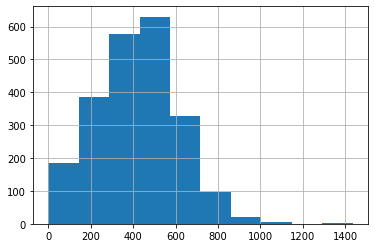

In [24]:
print(users_smart['minutes'].mean()) #Найдем среднее.
print(np.var(users_smart['minutes'])) #Найдем дисперсию.
print(np.std(users_smart['minutes'])) #Найдем стандартное отклонение.
users_smart['minutes'].hist() #Построим гистограму.

В среднем пользователи тарифа smart используют от 0 до 40 сообщений в месяц. Распределение ассиметрично и сильно скошено вправо. Много пользователей практически не пользуются сообщениями, и очень малое число пользователей отправляют более 60 сообщений в месяц.

33.36905829596412
796.5978766916688
28.224065559229217


<AxesSubplot:>

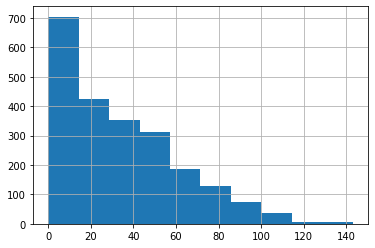

In [25]:
print(users_smart['messages'].mean()) #Найдем среднее.
print(np.var(users_smart['messages'])) #Найдем дисперсию.
print(np.std(users_smart['messages'])) #Найдем стандартное отклонение.
users_smart['messages'].hist() #Построим гистограму.

В среднем пользователи тарифа smart используют от 10 до 25 гб интернета в месяц. Распределение близко к нормальному.

16.32152466367713
33.11859498481772
5.754875757548352


<AxesSubplot:>

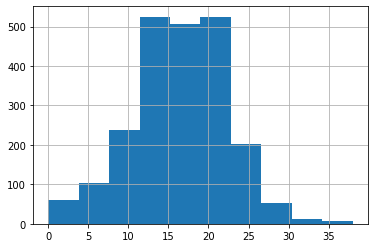

In [26]:
print(users_smart['gb_used'].mean()) #Найдем среднее.
print(np.var(users_smart['gb_used'])) #Найдем дисперсию.
print(np.std(users_smart['gb_used'])) #Найдем стандартное отклонение.
users_smart['gb_used'].hist() #Построим гистограму.

Проанализируем поведение пользователей тарифа ultra.  
В среднем пользователи тарифа ultra используют от 0 до 800 минут в месяц. Распределение скошено вправо, очень мало пользователей используют более 1000 минут, в то время как большое число пользователей тратит менее 500 минут.

526.0892494929006
100950.00623331097
317.72630711559117


<AxesSubplot:>

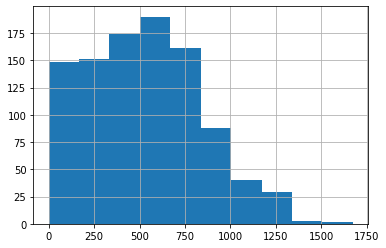

In [27]:
print(users_ultra['minutes'].mean()) #Найдем среднее.
print(np.var(users_ultra['minutes'])) #Найдем дисперсию.
print(np.std(users_ultra['minutes'])) #Найдем стандартное отклонение.
users_ultra['minutes'].hist() #Построим гистограму.

В среднем пользователи тарифа smart используют от 0 до 80 сообщений в месяц. Распределение ассиметрично и сильно скошено вправо. Много пользователей практически не пользуются сообщениями, и очень малое число пользователей отправляют более 80 сообщений в месяц.

49.31338742393509
2283.0995570851965
47.781791061922284


<AxesSubplot:>

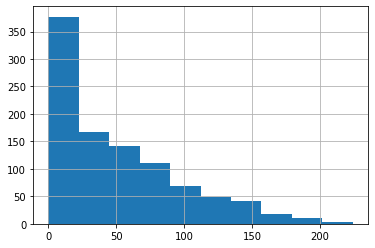

In [28]:
print(users_ultra['messages'].mean()) #Найдем среднее.
print(np.var(users_ultra['messages'])) #Найдем дисперсию.
print(np.std(users_ultra['messages'])) #Найдем стандартное отклонение.
users_ultra['messages'].hist() #Построим гистограму.

В среднем пользователи тарифа smart используют от 10 до 30 гб интернета в месяц. Распределение близко к нормальному.

19.474645030425965
97.27978308900676
9.863051408616238


<AxesSubplot:>

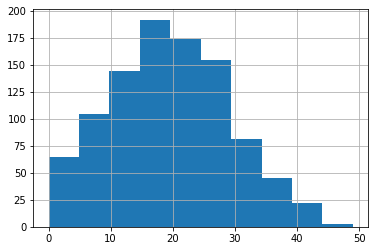

In [29]:
print(users_ultra['gb_used'].mean()) #Найдем среднее.
print(np.var(users_ultra['gb_used'])) #Найдем дисперсию.
print(np.std(users_ultra['gb_used'])) #Найдем стандартное отклонение.
users_ultra['gb_used'].hist() #Построим гистограму.

## Проверка гипотез

Необходимо проверить гипотезу, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.  
H0 - выручки равны  
H1 - выручки не равны  

In [30]:
alpha = 0.1 #Задаем порог.
results = st.ttest_ind(users_smart['month_profit'], users_ultra['month_profit'], equal_var=False) #Сравниваем выборки.
print('p-значение: ', results.pvalue)
if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу.')
else:
    print('Отвергаем нулевую гипотезу.')


p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу.


Проверка показала, что данная выборка не позволяет сделать вывод, что выручки по тарифам равны. Полученное значение p-value слишком мало, соответсвенно, вероятность того, различие между выручками по тарифам в данной выборке случайно - крайне мала. Средняя вырочку клиента тарифа ultra в данной выборке практически в два раза больше, чем клиента тарифа smart. В то же время по выборке общая выручка за год по тарифу smart почти в полтора раза больше, чем по тарифу ultra. Это связано с тем, что у тарифа smart в 2.3 раза больше пользователей.

In [31]:
print(users_smart['month_profit'].mean())
print(users_ultra['month_profit'].mean())

1289.6417040358745
2070.030425963489


Посчитаем выручку по тарифам за год:

In [32]:
print(users_smart['month_profit'].sum())
print(users_ultra['month_profit'].sum())
print(users_smart['month_profit'].sum() / users_ultra['month_profit'].sum())

2875901.0
2041050.0
1.4090301560471326


Сравним количество клиентов тарифов.

In [33]:
print(users.query('tariff == "smart"')['user_id'].count() / users.query('tariff == "ultra"')['user_id'].count())

2.3557046979865772


Необходимо проверить гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.   
H0 - выручки равны  
H1 - выручки не равны  

In [34]:
users = users_smart.append(users_ultra, ignore_index=True) #Объединим пользователей всех тарифов с информацией о выручке за месяц.
users_moscow = users.query('city == "Москва"').copy() #Создаем таблицу с данными о пользователях из Москвы.
users_others = users.query('city != "Москва"').copy() #Создаем таблицу с данными о пользователях из других регионов.
alpha = 0.1 #Задаем порог.
results = st.ttest_ind(users_moscow['month_profit'], users_others['month_profit'], equal_var=False) #Сравниваем выборки.
print('p-значение: ', results.pvalue)
if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу.')
else:
    print('Отвергаем нулевую гипотезу.')

p-значение:  0.5216952110000279
Не получилось отвергнуть нулевую гипотезу.


Полученное значение p-value говорит о том, что то, что различие выручки в Москве и других регионах может быть получено случайно с вероятностью 11%. Это слишком большое значение для того, чтобы на основе данной выборке отвергать гипотезу о том, что выручки в Москве и остальных регионах различаются.

In [35]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

В ходе исследования была проанализирована выборка из 500 пользователей федерального оператора сотовой связи "Мегалайн" с целью определения, в рекламу какого тарифа стоит вкладываться компании - "Смарт" или "Ультра".
- Были обработаны данные, удалены пропуски.
- Было подсчитано, сколько в среднем за месяц каждый пользователь совершает звонков, тратит минут, сообщений и мегабайт интернета. Также была подсчитана средняя выручка каждого пользователя за месяц.
- Были проанализированы полученные результаты. В среднем пользователи тарифа smart используют 200-600 минут в месяц, от 0 до 40 сообщений и от 10 до 25 гигабайт интернета в месяц. А пользователи тарифа ultra используют 0-800 минут в месяц, от 0 до 80 сообщений и от 10 до 30 гигабайт интернета в месяц.
- Была проверена гипотеза, что средняя выручка тарифов "Смарт" и "Ультра" отличается. Предоставленная выборка не позволила отвергнуть данную гипотезу. Средняя выручка по тарифу "Ультра" одного клиента из выборки почти в два раза больше, чем по тарифу "Смарт". Однако, общая выручка по тарифу "Смарт" за год почти в полтора раза превысила выручку по тарифу "Ультра", это связано с тем, что клиентов у тарифа "Смарт" в 2,3 раза больше. Таким образом, можно порекомендовать компании вкладываться в рекламу тарифа "Смарт", так как, несмотря на то, что средняя выручка с одного клиента у данного тарифа меньше, он является более популярным среди клиентов, и, можно предположить, что его реклама принесет компании больше новых клиентов, чем реклама тарифа "Ультра".
- Также была проверена гипотеза, что выручка отличается в Москве и других регионах. Подтвердить данную гипотезу на основе предоставленной выборки не получилось.